# Análisis de Datos de Airbnb en Nueva York

En este proyecto se analiza un conjunto de datos de alquileres de viviendas en la ciudad de Nueva York, recopilados a través de la plataforma Airbnb durante el año 2019. El objetivo principal es comprender las características y tendencias del mercado de alquiler vacacional en la ciudad, identificando patrones relevantes y posibles oportunidades de mejora para anfitriones, huéspedes o interesados en el sector.

## Objetivos del análisis

1. **Exploración y comprensión de los datos:**  
   Se realizará un análisis exploratorio (EDA) para conocer la estructura del dataset, la calidad de los datos y las variables más relevantes.

2. **Limpieza y preprocesamiento:**  
   Se eliminarán duplicados, valores atípicos y columnas irrelevantes, asegurando que el conjunto de datos sea adecuado para futuros modelos de machine learning o análisis estadístico.

3. **División del conjunto de datos:**  
   El dataset se dividirá en conjuntos de entrenamiento y prueba para facilitar la validación de modelos predictivos.

4. **Almacenamiento de los datos procesados:**  
   Los datos finales, listos para su uso, se guardarán en la carpeta `./data/processed` (excluida del control de versiones por privacidad y tamaño).

Este análisis servirá como base para la toma de decisiones informadas sobre el mercado de alquileres en Nueva York y para el desarrollo de modelos predictivos en etapas posteriores.

## Exploratory Data Analysis (EDA)

### 0. Importando librerías

In [76]:
import pandas as pd
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import json
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### 1. Planteamiento del problema y recopilación de datos

In [3]:
airbhb_csv = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
airbhb_csv.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbhb_csv.shape

(48895, 16)

## 2. Exploración y limpieza

**2.1. Comprensión de los datos**

In [5]:
airbhb_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* `id`: Identificador de la vivienda (numerico)
* `name`: Nombre de la vivienda en la aplicación (categórico)
* `host_id`: Identificador del arrendador (numérico)
* `host_name`: Nombre del arrendador (categórico)
* `neighbourhood_group`: Distrito principal de la ciudad de Nueva York donde se encuentra la vivienda (categórico). Ejemplo: Brooklyn, Manhattan, Queens, Bronx, Staten Island
* `neighburhood`: Vecindario (categórico)
* `latitude`: Coordenada de latitud de la ubicación del alojamiento (numérico)
* `longitude`: Coordenada de longitud de la ubicación del alojamiento (numérico)
* `room_type`: Tipo de habitación ofrecida (categórico). Ejemplo: Entire home/apt, Private room, Shared room, Hotel room.
* `price`: Precio por noche del alojamiento en dólares estadounidenses (numérico).      
* `minimum_nights`: Número mínimo de noches requeridas por el anfitrión para reservar (numérico)
* `number_of_reviews`: Cantidad total de reseñas recibidas por el alojamiento (numérico)
* `last_review`: Fecha de la última reseña recibida (fecha, puede contener valores nulos)
* `reviews_per_month`: Promedio de reseñas recibidas por mes (numérico, puede contener valores nulos)
* `calculated_host_listings_count`: Número de propiedades que el mismo anfitrión tiene listadas en la plataforma (numérico)
* `availability_365`: Número de días que el alojamiento estuvo disponible para reserva en el año (numérico, rango de 0 a 365)


* El dataset cuenta con 48895 entradas que corresponden a las viviendas de Airbnb en Nueva york, ademas de 16 columnas.
* 10 columnas corresponden a datos numéricos
* 6 columnas sirven para datos categóricos

**2.2. Identificando nulos y duplicados**

In [7]:
airbhb_csv.duplicated().sum()[airbhb_csv.duplicated().sum()>0]

array([], dtype=int64)

In [6]:
airbhb_csv.isna().sum()[airbhb_csv.isna().sum()>0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [11]:
airbhb_csv['name'] = airbhb_csv['name'].fillna('Unknown')
airbhb_csv['host_name'] = airbhb_csv['host_name'].fillna('Unknown')

airbhb_csv['reviews_per_month'] = airbhb_csv['reviews_per_month'].fillna(0)

airbhb_csv['last_review'] = airbhb_csv['last_review'].fillna('No review')

In [12]:
airbhb_csv.isna().sum()[airbhb_csv.isna().sum()>0]

Series([], dtype: int64)

**2.3. Eliminando información irrelevante**

Hay que eliminar contenidos que puedan no ser relevantes, tener varios valores nulos o demasiado dispersos para el estudio.
* `id`, `host_id`: Son identificadores únicos que no aportan información útil para el análisis estadístico o la predicción, ya que solo sirven para distinguir registros.
* `name`, `host_name`: Son textos libres que no contienen información estructurada relevante para el análisis y pueden introducir ruido.
* `neighbourhood`: Es una variable muy específica (nivel micro) y ya se cuenta con la columna neighbourhood_group, que agrupa los barrios de forma más general y útil para el análisis.
* `last_review`, `reviews_per_month`: Estas columnas presentan una gran cantidad de valores nulos a pesar del control de nulos hechos previamente, lo que dificulta su uso y puede afectar la calidad del análisis. Además, su aporte informativo es limitado para el objetivo principal del estudio.

In [13]:
airbhb_csv.drop(["id", "name", "host_id", "host_name", "neighbourhood","last_review", "reviews_per_month"], axis = 1, inplace = True)
airbhb_csv.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


## 3. Análisis univariante

**3.1. Dividir el Dataset en categóricos y numéricos**

In [14]:
df_copy = airbhb_csv.copy()
df_copy.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [16]:
info_data = df_copy.dtypes
numerical_column = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_column = df_copy.select_dtypes(include=['object']).columns.tolist()

**3.2. Análisis sobre variables categóricas**

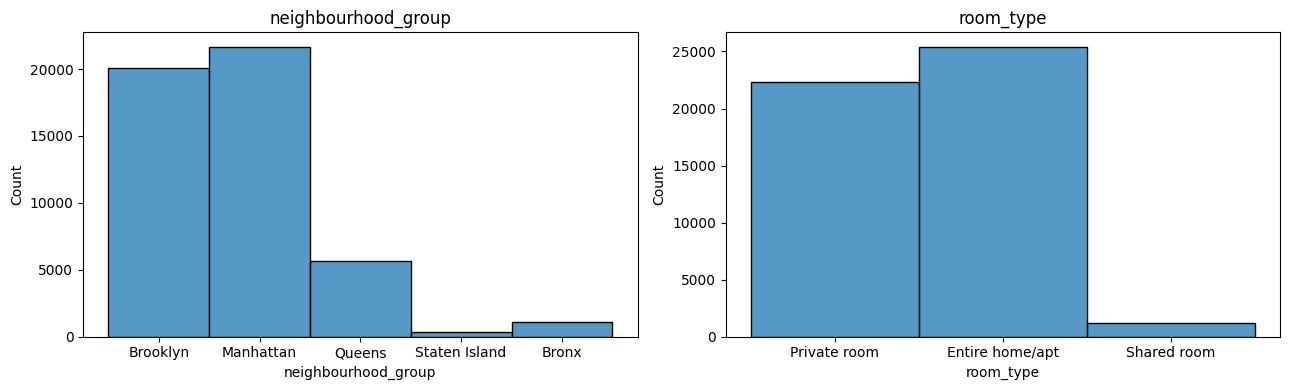

In [19]:
n = len(categorical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(13, 4 * n_rows))

axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for index, name_col in enumerate(categorical_column):
    r, c = divmod(index, n_cols)
    sns.histplot(ax = axis[r, c], data=airbhb_csv, x = name_col)
    axis[r, c].set_title(name_col)


plt.tight_layout()
plt.show()

* **Grupo de vecindad**
  * La mayoría de los alojamientos están en Manhattan, seguido de Brooklyn. 
  * Estas áreas superan aproximadamente 3 veces mas que la área de Queens, que es la tercera en popularidad.
  * Hay pocas propiedades en Staten Island y Bronx, lo que indica que estas áreas son menos populares para los turistas o viajeros.

* **Tipo de habitación**
  * La mayoría de los alojamientos son casas enteras o apartamentos completos, seguidos de habitaciones privadas.
  * Una pequeña cantidad de alojamientos son habitaciones compartidas.

**3.3. Análisis sobre variables numéricas**

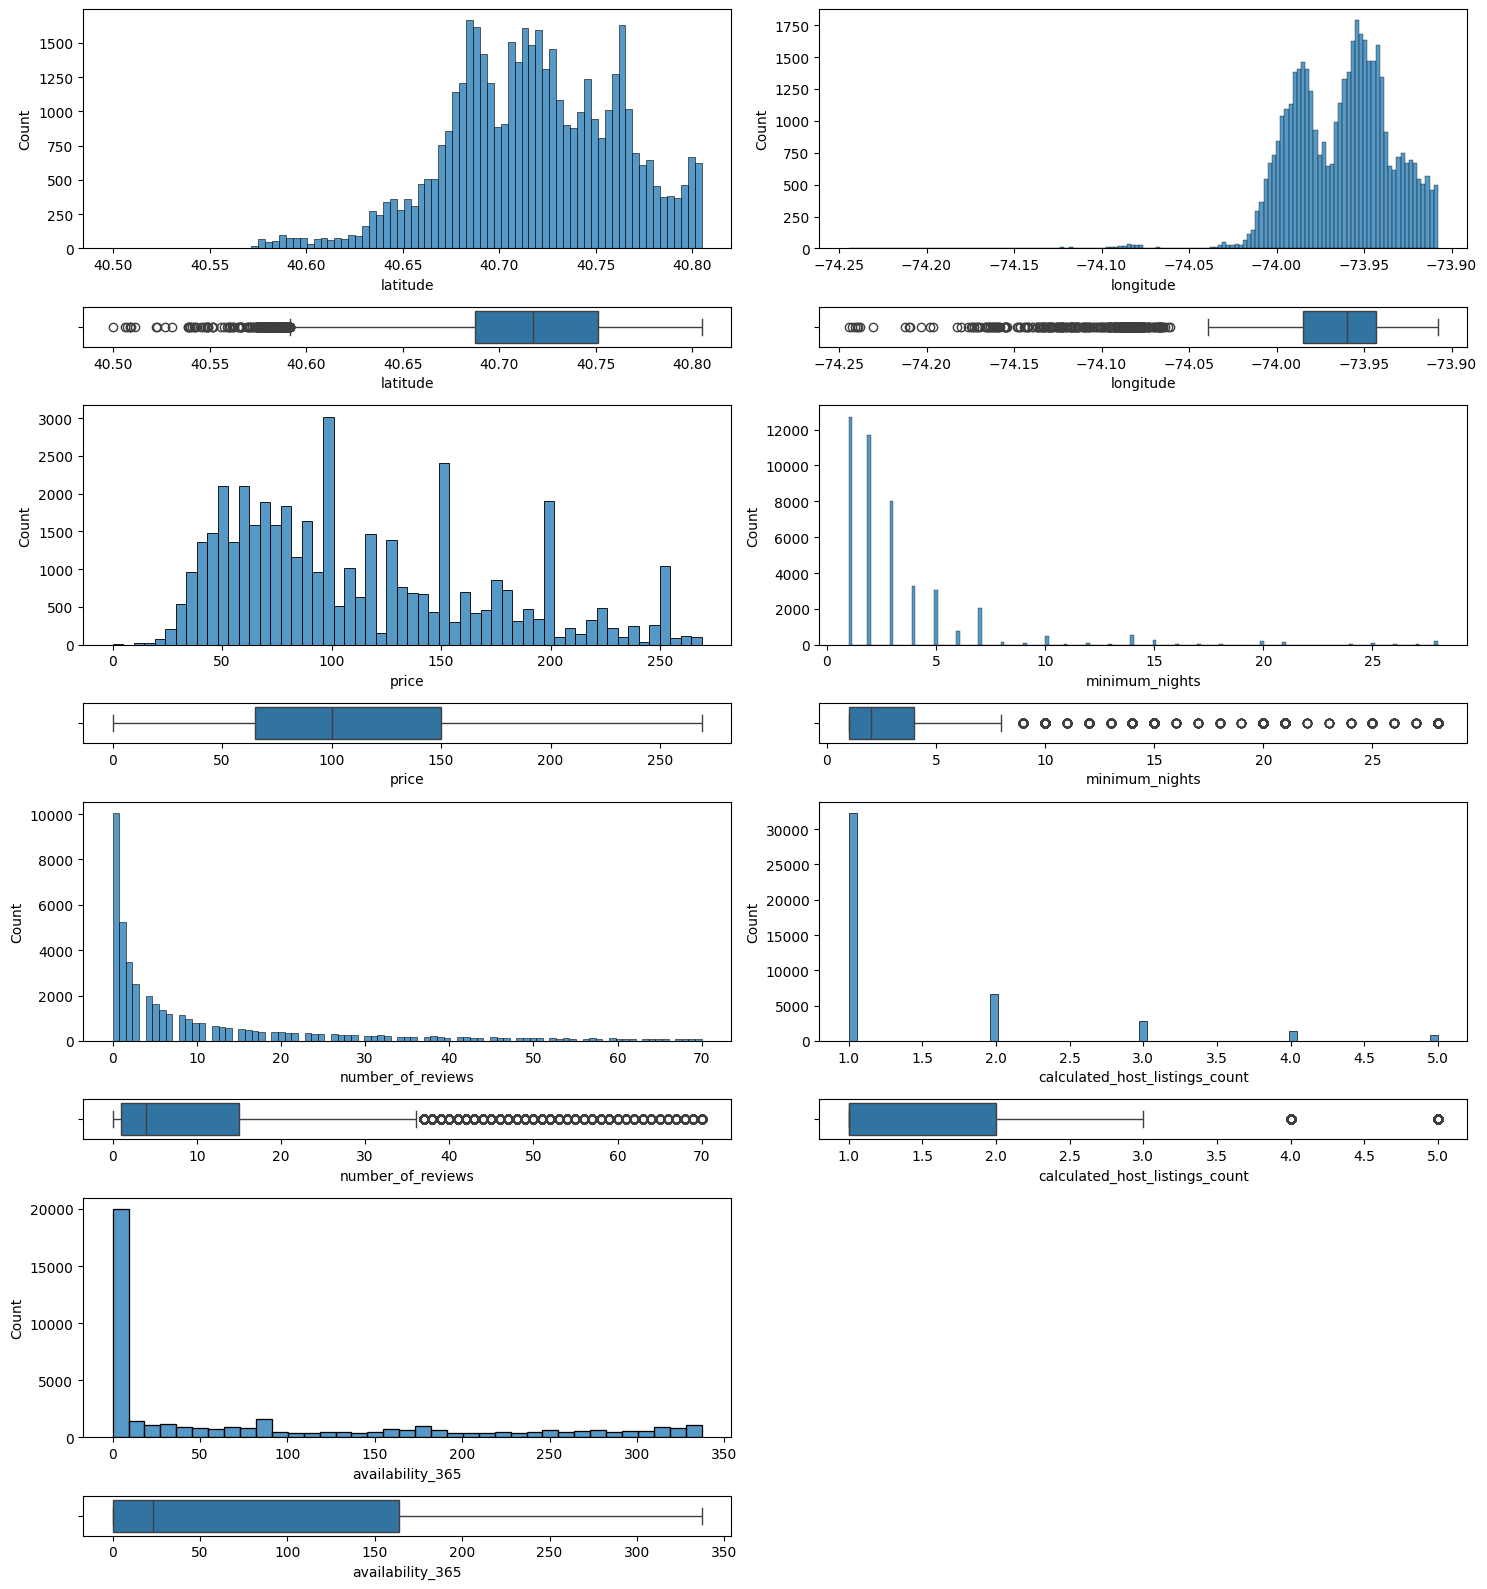

In [ ]:
n = len(numerical_column)
n_cols = 2
n_rows = math.ceil(n / n_cols) * 2  # Dos filas por variable para histogramas y boxplots

# Alternar alturas: filas pares grandes para historigraam e impares pequeñas para boxplot
height_ratios = []
for _ in range(n_rows // 2):
    height_ratios.extend([6, 1])
    
if len(height_ratios) < n_rows:
    height_ratios.append(1)  # Por si hay una fila extra

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows), gridspec_kw={'height_ratios': height_ratios})

# Asegurar que axis siempre sea 2D
axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)


for idx, col in enumerate(numerical_column):

    #Limitar los datos a los valores por debajo del percentil 90
    datos_filtrados = airbhb_csv[col].copy()
    limite = datos_filtrados.quantile(0.90)
    datos_filtrados = datos_filtrados[datos_filtrados <= limite]

    # Calcular la posición en la cuadrícula
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1

    sns.histplot(ax=axis[row_hist, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)
    sns.boxplot(ax=axis[row_box, col_pos], data=datos_filtrados.to_frame(), x=datos_filtrados.name)


# Ocultar subplots vacíos (Esto sirve si hay un número impar a revisar)
for idx in range(n, (n_rows // 2) * n_cols):
    grid_pos = idx // n_cols
    col_pos = idx % n_cols
    row_hist = grid_pos * 2
    row_box = row_hist + 1
    fig.delaxes(axis[row_hist, col_pos])
    fig.delaxes(axis[row_box, col_pos])

plt.tight_layout()
plt.show()

* Hay picos destacables en `calculated_host_listing_cont`, `availability_365`
* Algunos gráficos siguen una distribuvión normal con pequeñas variaciones como `latitude`, `longitude`
* `number_of_reviews`, `minimum_nights` siguen una función decreciente
* `price` es el mas variado, tiene una distribución similar a la normal pero con varios picos altos distribuidos cada 50 valores

### 4. Análisis multivariante
**4.1. Codificación de valor categorico - numericos**


In [21]:
def plot_numerical_analisis(column, numerical_column, name = None, column_info = False):
    
    if name is None:
        name = column

    columna_n = f"{column}_n"
    df_plot = airbhb_csv.copy()
    df_plot[columna_n] = pd.factorize(df_plot[column])[0]

    if column_info:
        print(df_plot[[columna_n, column]].drop_duplicates())

    n = len(numerical_column)
    n_cols = 2
    n_rows = math.ceil(n / n_cols) * 2

    fig, axis = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

    axis = np.array(axis)
    if axis.ndim == 1:
        axis = axis.reshape(-1, n_cols)

    for idx, col in enumerate(numerical_column):
        limite = df_plot[col].quantile(0.90)
        datos_filtrados = df_plot[df_plot[col] <= limite]

        grid_pos = idx // n_cols
        col_pos = idx % n_cols
        row_hist = grid_pos * 2
        row_box = row_hist + 1

        sns.regplot(ax=axis[row_hist, col_pos], data=datos_filtrados, x=col, y=columna_n).set(ylabel=name)
        sns.heatmap(
            datos_filtrados[[col, columna_n]].corr()
            .rename(columns={columna_n: name}, index={columna_n: name}),
            annot=True, fmt=".2f", ax=axis[row_box, col_pos], cbar=False)
        

    for idx in range(n, (n_rows // 2) * n_cols):
        grid_pos = idx // n_cols
        col_pos = idx % n_cols
        row_hist = grid_pos * 2
        row_box = row_hist + 1
        fig.delaxes(axis[row_hist, col_pos])
        fig.delaxes(axis[row_box, col_pos])

    plt.tight_layout()
    plt.show()

* Tipo de cuarto - (variables numericas)

    room_type_n        room_type
0             0     Private room
1             1  Entire home/apt
39            2      Shared room


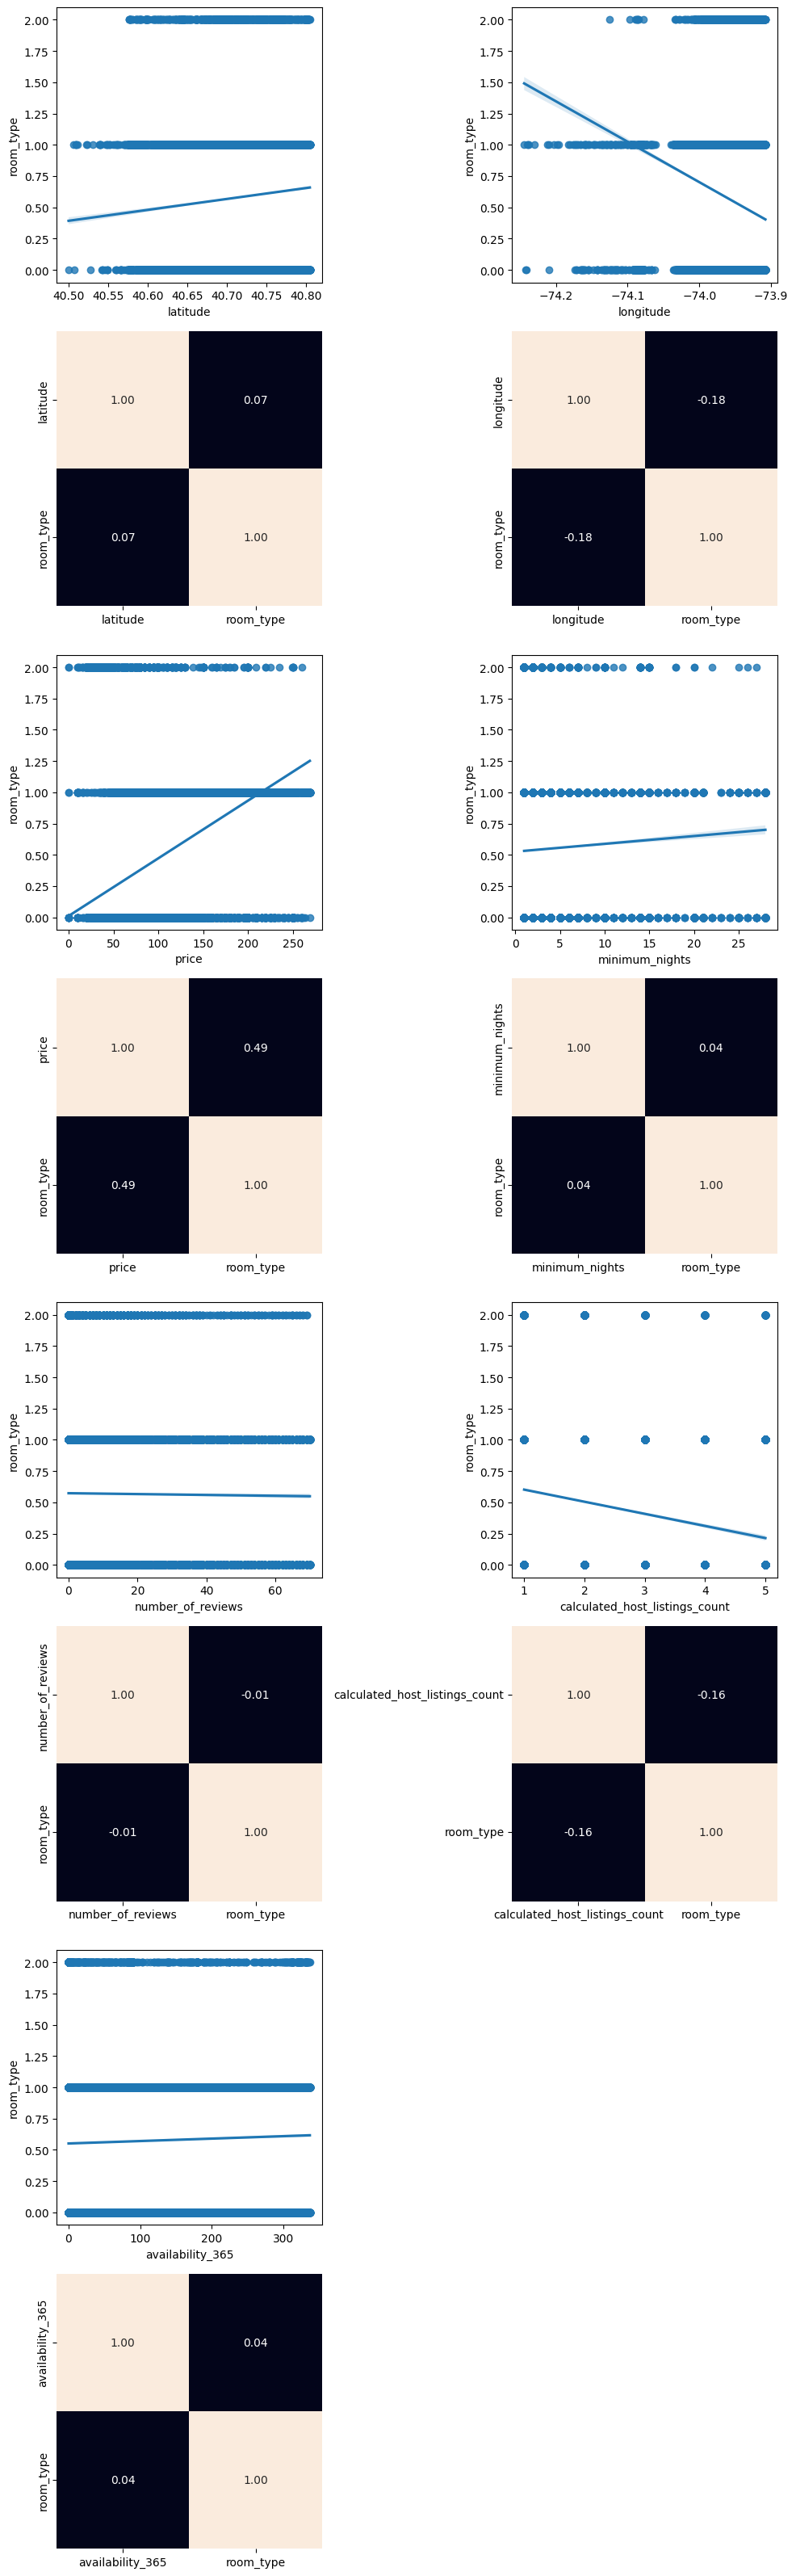

In [22]:
plot_numerical_analisis("room_type", numerical_column, column_info=True)

Parece que hay una relación media entre el precio (price) y el tipo de cuarto (room_type). Las casas o departamentos enteros son los que tiene n los precios promedio mas altos, debe ser por el tamaño de la propiedad. Los cuartos privados tienen precios mas equilibrados y finalmente las habiraciones compartidas son las que parecen tener precios mas baratos.

**4.2. Numéroco-Numérico Análisis**

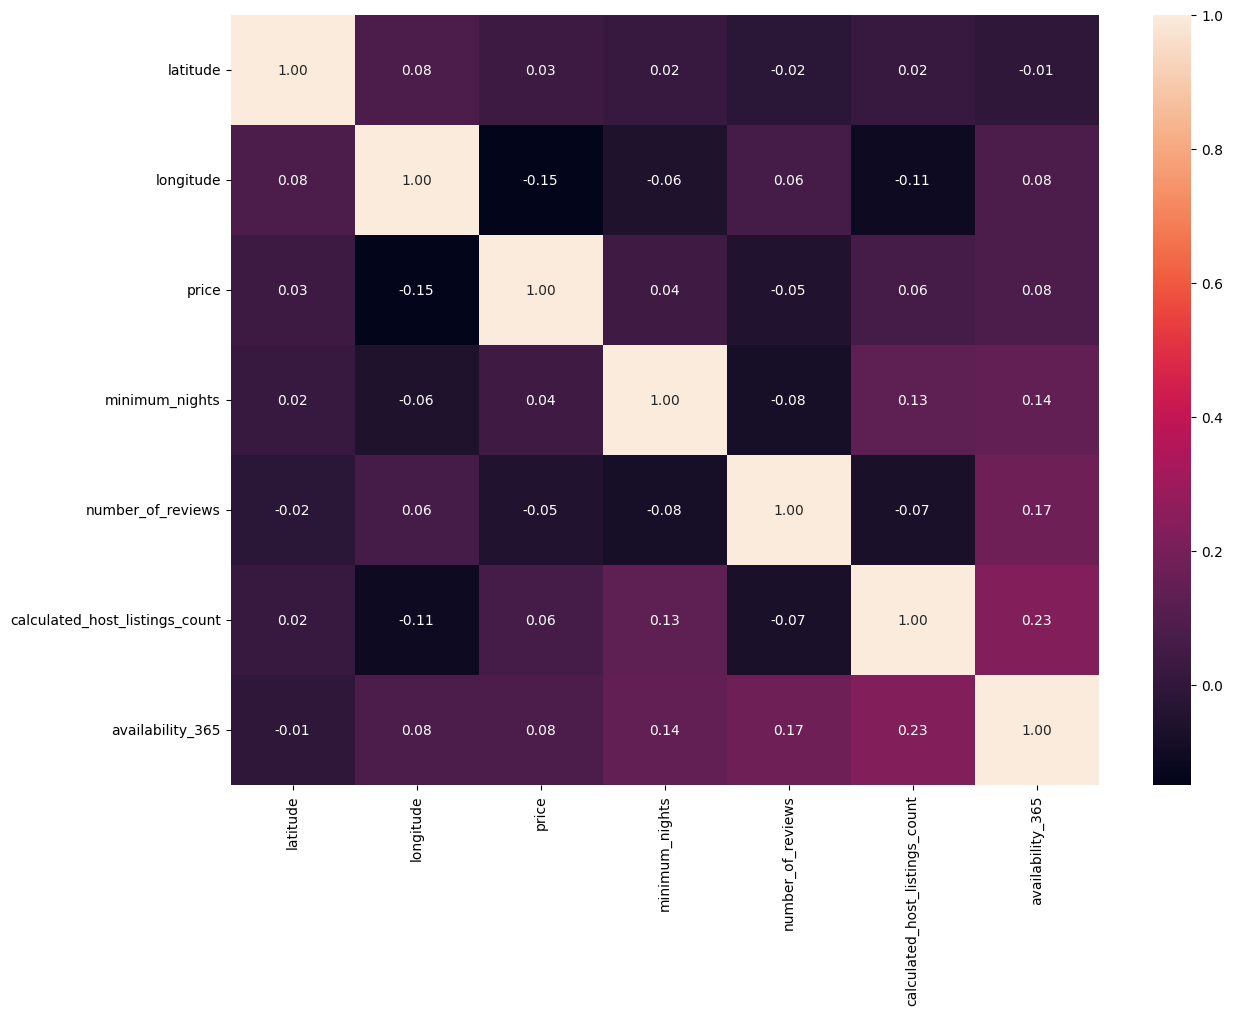

In [27]:
plt.figure(figsize=(14,10))

df_onlyn =  df_copy[numerical_column]

sns.heatmap(df_onlyn.corr().round(2), annot = True, fmt = ".2f")

plt.show()

* Parece habe una mínima relación entre `calculated_host_listings_count` y `availability_365`

**4.3. Categórico-Categórico Análisis**

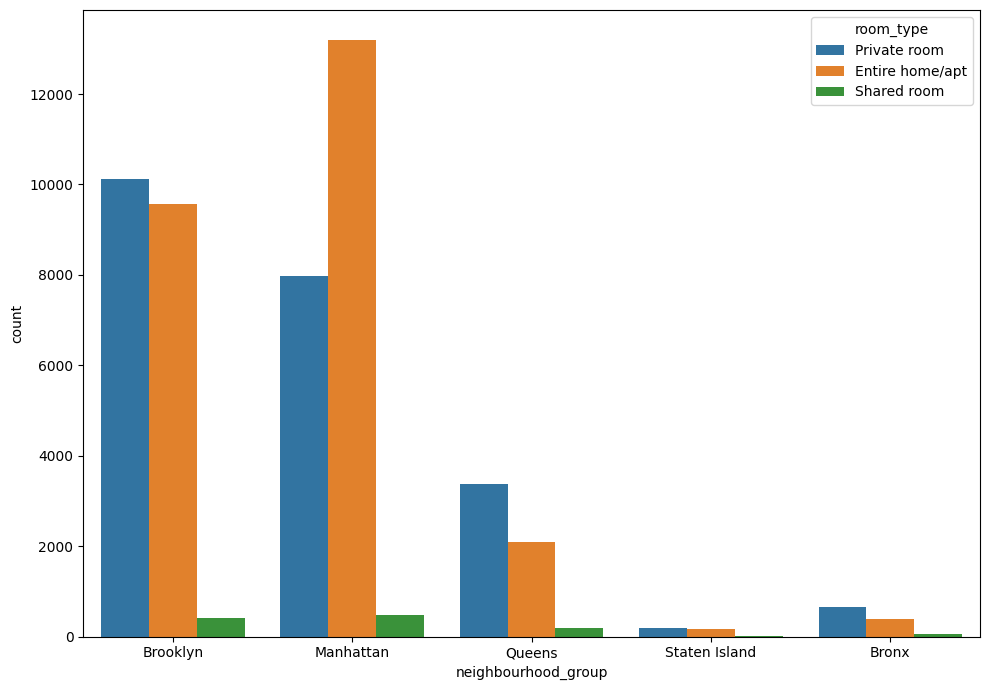

In [26]:
fig, axis = plt.subplots(1, 1, figsize=(10, 7))

sns.countplot(ax=axis, data=airbhb_csv, x="neighbourhood_group", hue="room_type")

plt.tight_layout()
plt.show()

plt.show()

* Manhattan es el sitio con mayores pisos/casas enteras de airbnb, es posible que haya mas posibilidad de que se pueda rentar casas enteras ahi en relación a otros grupos.
* El grupo con menos tipos de vivienda es el de Staten Island
* Brooklyn es el lugar con mayor equidad entre cuartos privados y pisos/casas enteras, lo que demuestra que hay mas distribución de aparttamentos en la zona

**4.4. Combinación de predictoras**

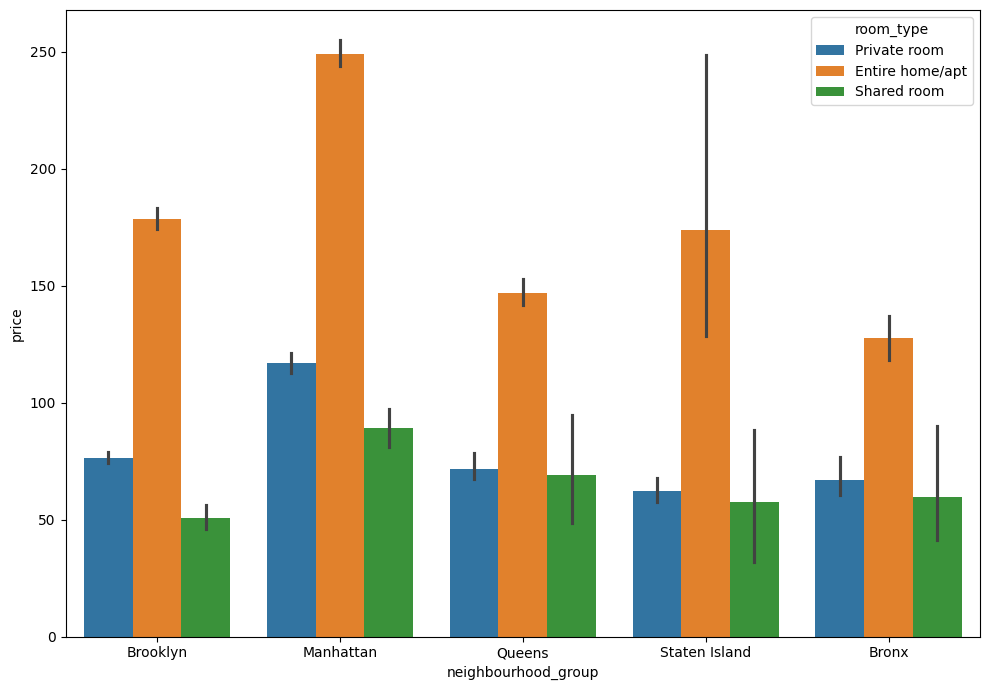

In [28]:
fig, axis = plt.subplots(1, 1, figsize=(10, 7))

sns.barplot(ax=axis, data = airbhb_csv, x = "neighbourhood_group", y = "price", hue = "room_type")

plt.tight_layout()

plt.show()

* Manhattan tiene los precios mas altos, sobre todo para pisos/casas enteras con una media de 250$
* Brooklyn y Staten Island tienen precios similares para pisos/casas enteros (aprox 175$), pero Staten Island muestra una gran variedad de precios.
* Hay pocos cuartos compartidos a pesar de ser mas baratos
* Los cuartos privadas tienen precios más uniformes entre los vecindarios, con valores entre $60 y $120.

**4.5. Codificación de valores categóricos y almacenamiento de archivos JSON**

In [31]:
df_num_total = airbhb_csv.copy()
lista_cambios = []

for col in df_num_total.columns:
    if df_num_total[col].dtype == 'object':
        df_num_total[f"{col}_n"] = pd.factorize(df_num_total[col])[0]
        lista_cambios.append(col)
        print(df_num_total[[f"{col}_n", col]].drop_duplicates())

print(f"Las siguientes columnas fueron convertidas a numéricas: {lista_cambios}")

     neighbourhood_group_n neighbourhood_group
0                        0            Brooklyn
1                        1           Manhattan
46                       2              Queens
169                      3       Staten Island
171                      4               Bronx
    room_type_n        room_type
0             0     Private room
1             1  Entire home/apt
39            2      Shared room
Las siguientes columnas fueron convertidas a numéricas: ['neighbourhood_group', 'room_type']


In [32]:
diccionarios_codificacion = {}

for col in lista_cambios:
    col_n = f"{col}_n"
    # Para cada valor de columna se asocia un valor numerico único
    mapeo = {row[col]: row[col_n] for index, row in df_num_total[[col, col_n]].drop_duplicates().iterrows()}
    diccionarios_codificacion[col] = mapeo

for col, mapeo in diccionarios_codificacion.items():
    print(f"Diccionario para {col}:")
    print(mapeo)
    print()

Diccionario para neighbourhood_group:
{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}

Diccionario para room_type:
{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}



In [33]:
for col, mapeo in diccionarios_codificacion.items():

    # Escritura
    with open(f"../data/processed/{col}_n.json", "w") as f:
        json.dump(mapeo, f)

    # Lectura
    with open(f"../data/processed/{col}_n.json", "r") as f:
        mapeo_loaded = json.load(f)
    
    #Convierte los balores categóricos a su valor numerico correspondiente usando el diccionario
    df_num_total[col + "_n"] = df_num_total[col].apply(lambda x: mapeo_loaded[x] if not pd.isna(x) else np.nan)

df_num_total

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,0,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,1,0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9,0,0
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36,0,0
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,1
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2,1,2


**4.5. Análisis final de correlaciones**


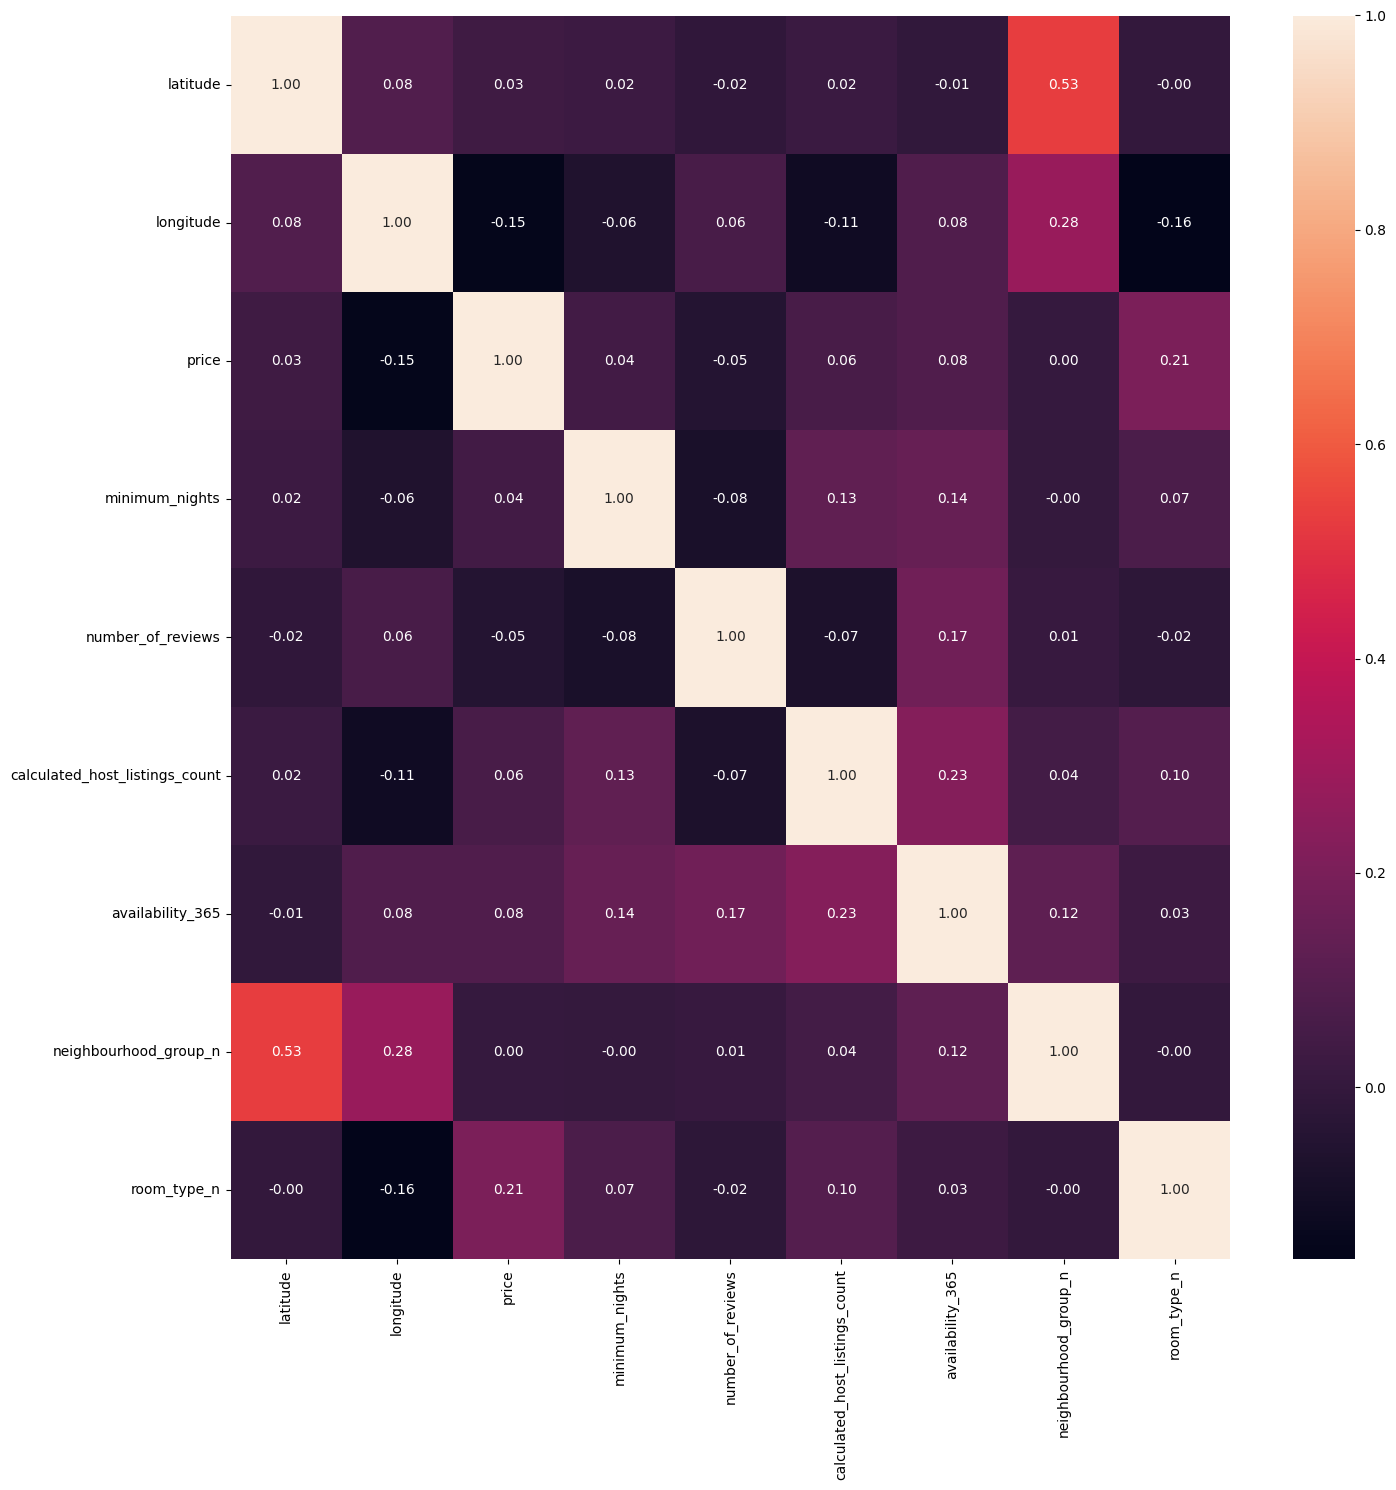

In [35]:
fig, axis = plt.subplots(figsize = (15, 15))

num_list = [col for col in df_num_total.columns if df_num_total[col].dtype == "int64" or df_num_total[col].dtype == "float64"]
df_enc = df_num_total[[col for col in df_num_total.columns if col in num_list]]
sns.heatmap(df_num_total[num_list].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

* En el analisis se ve que hay una gran correlación entre el grupo de vecindario (neighbourhood_groop_n) y la latitud y longitud, esto por que hacen referencias a ubicaciones globales epecíficas. 
* Hay una relacion entre el tipo de cuarto y el precio como hemos visto antes.
* Hay otra relacion entre calculated_host_listings_count y availability_365, los usuarios con mas propiedades tienen mas disponibilidad al año

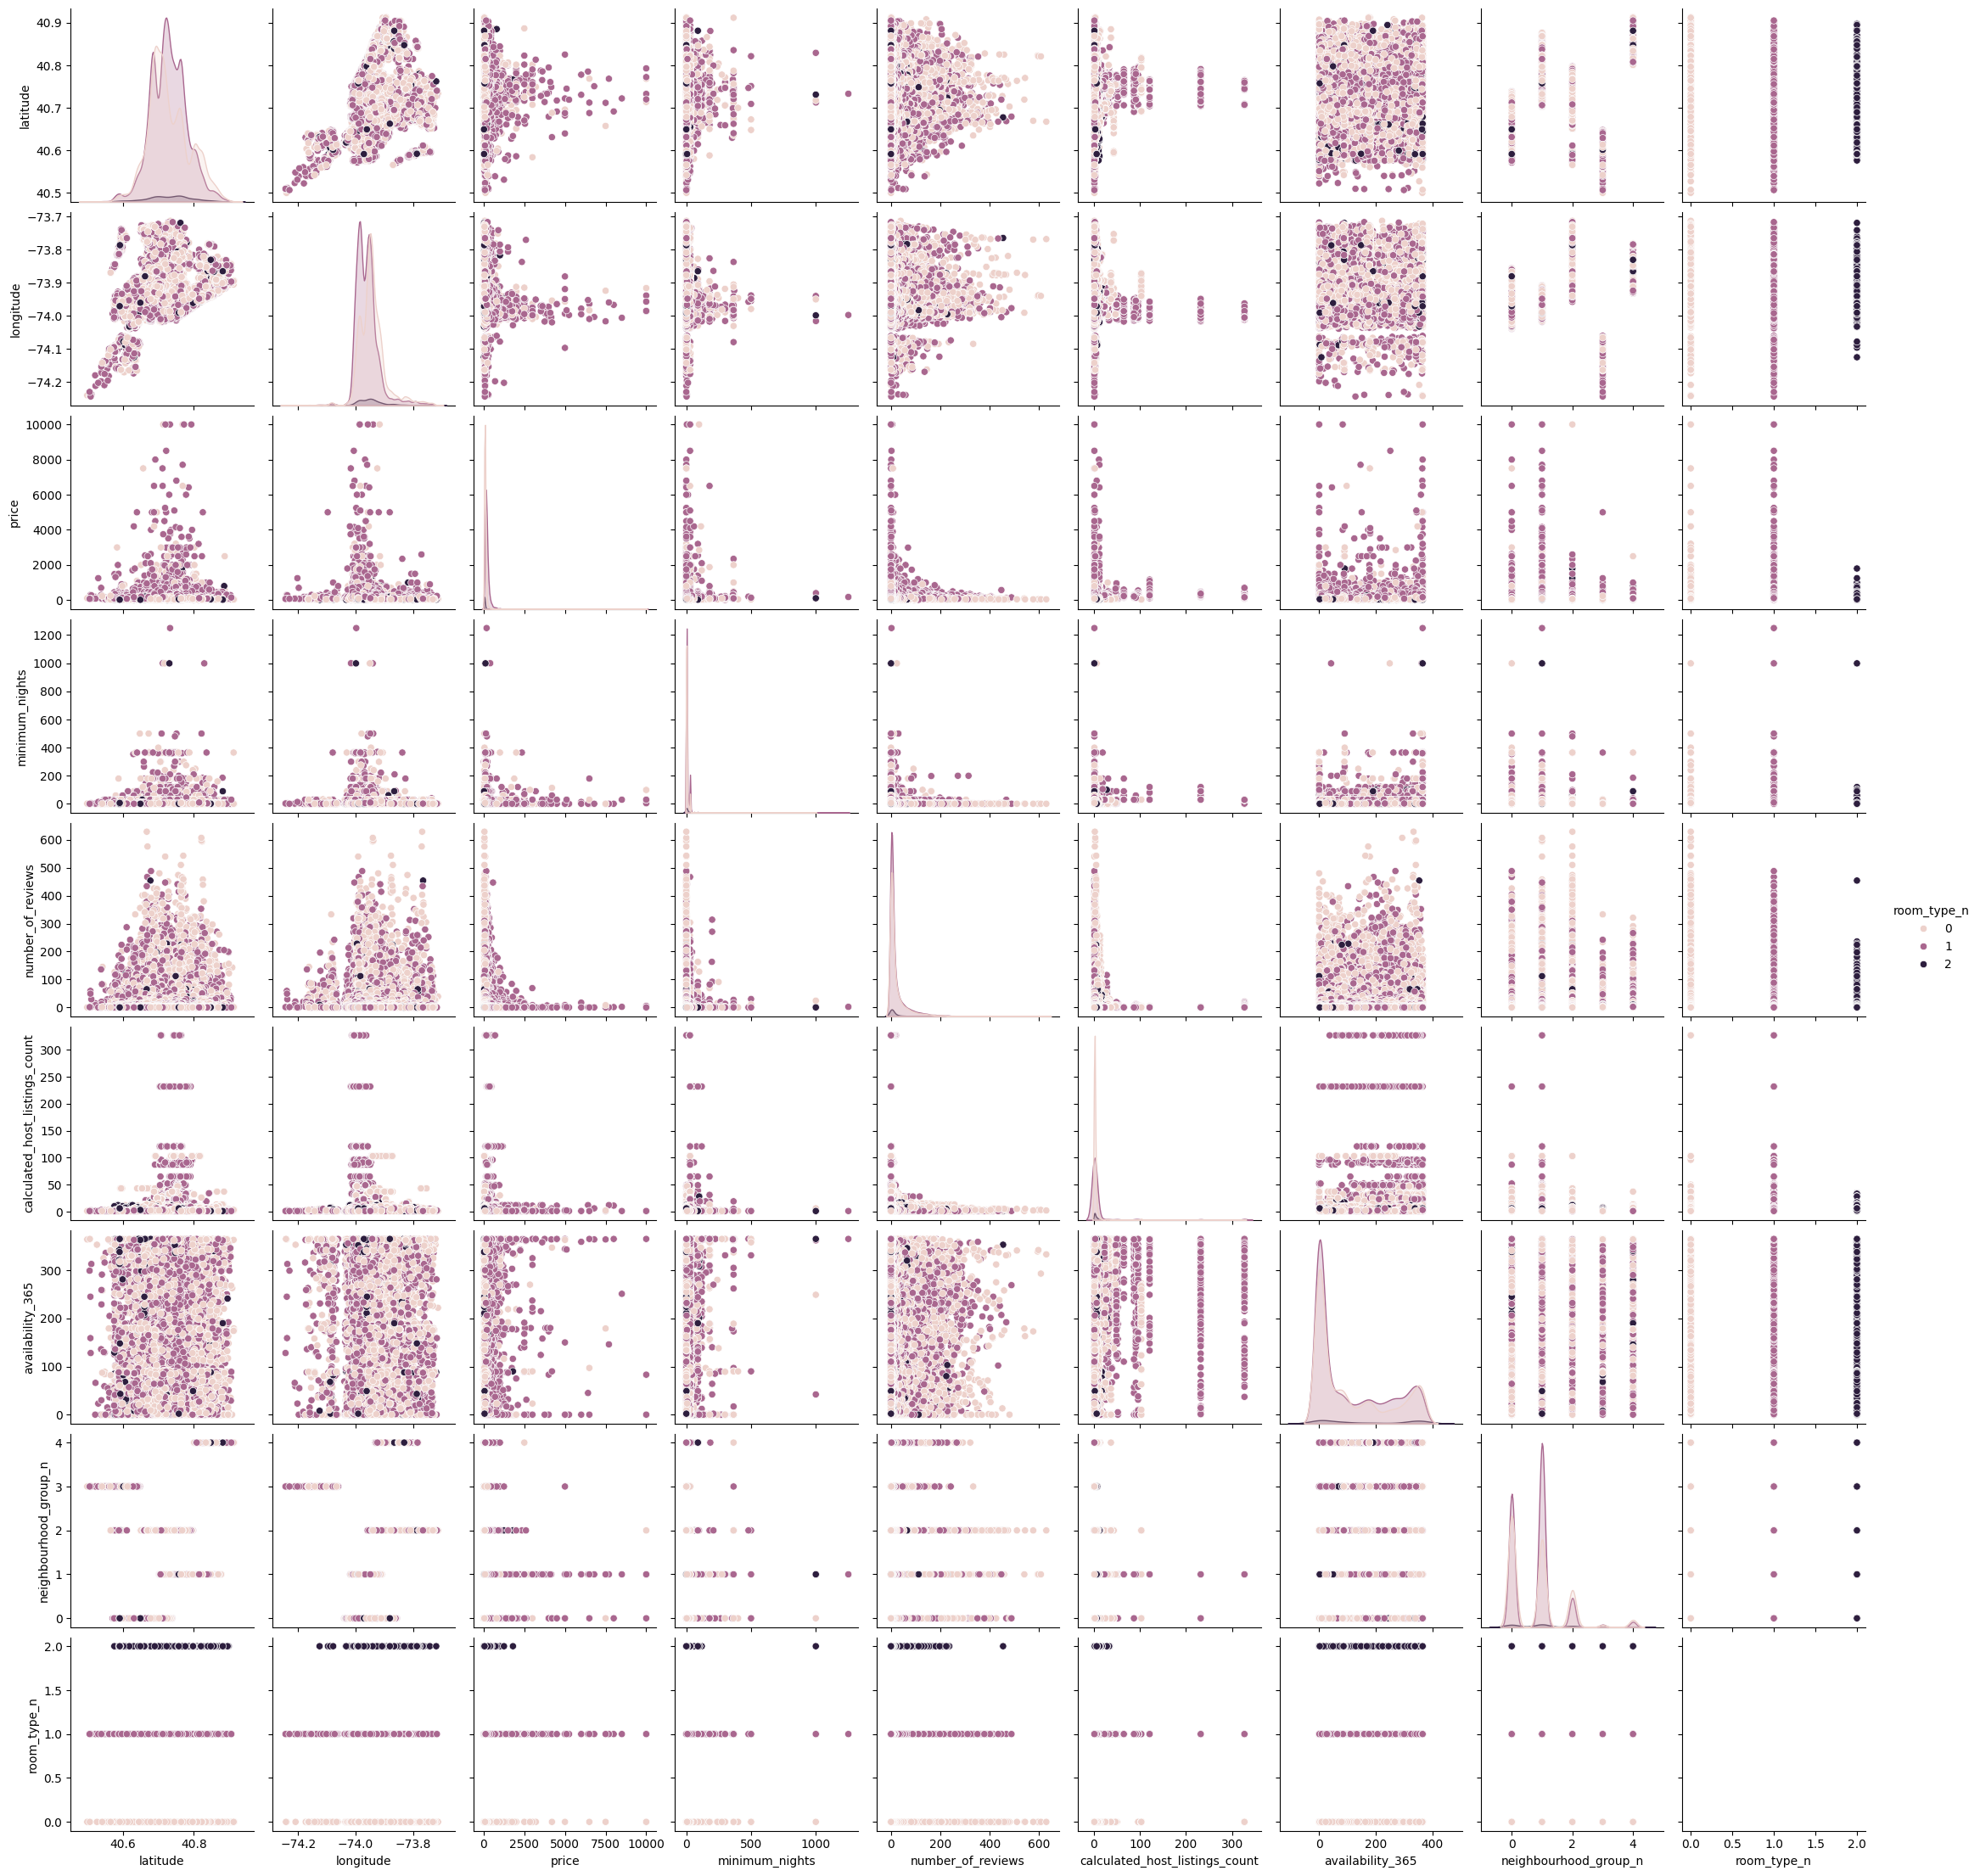

In [36]:
sns.pairplot(data = df_num_total, vars = df_num_total[num_list], hue = "room_type_n")

### 5. Ingeniería de características
**5.1. Análisis de outliers**

In [43]:
df_enc.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.786911,0.567113
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.844386,0.541249
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,2.000000


Las siguientes columnas continuas fueron identificadas: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_n', 'room_type_n']


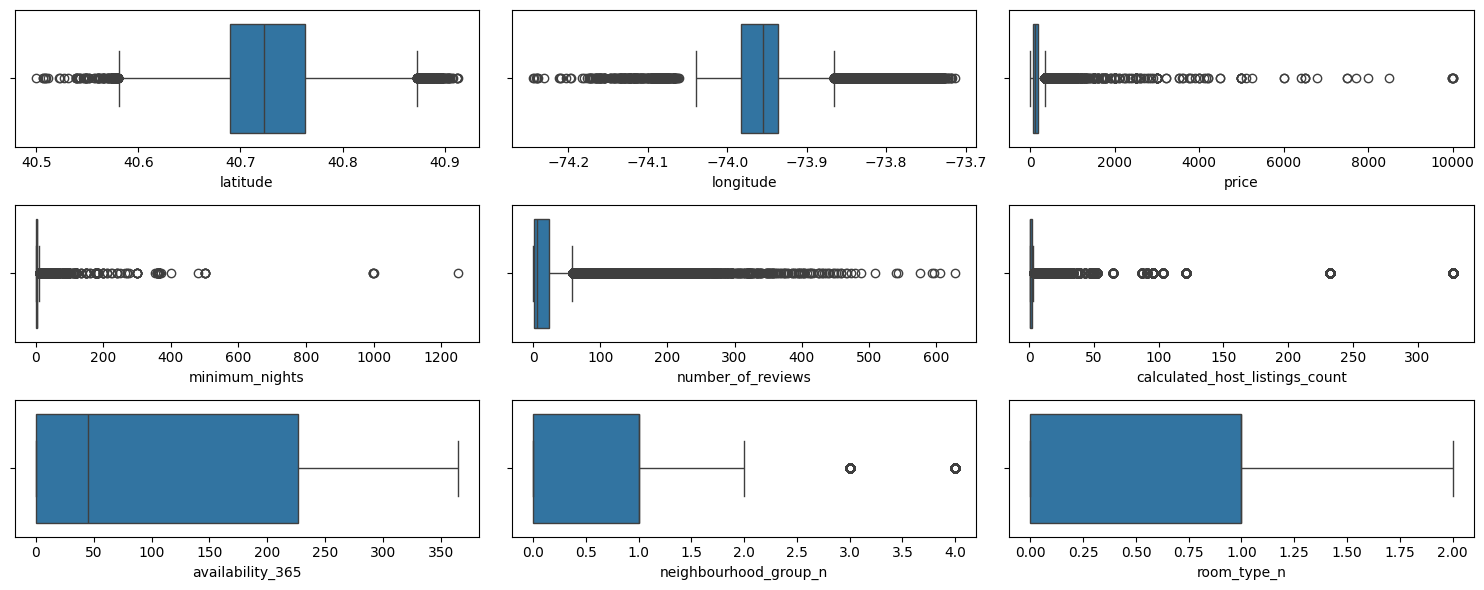

In [ ]:
print(f"Las siguientes columnas continuas fueron identificadas: {num_list}")
n = len(num_list)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))

axis = np.array(axis)
if axis.ndim == 1:
    axis = axis.reshape(-1, n_cols)

for idx, col in enumerate(df_enc[num_list]):
    row = idx // n_cols
    col_pos = idx % n_cols
    sns.boxplot(ax=axis[row, col_pos], data=df_enc, x=col)

# Oculta subplots vacíos
for idx in range(len(num_list), n_rows * n_cols):
    row = idx // n_cols
    col_pos = idx % n_cols
    fig.delaxes(axis[row, col_pos])

plt.tight_layout()
plt.show()

* Hay varios puntos atipicos en 'Latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count' y 'neigh_g_n'
* Neigh_g_n va respecto a 4 tipos de vecindario asi que de momento no le daremos importancia.
* La que se tiene mas enfoque en remediar ahora es la de precio

In [47]:
price_stats = airbhb_csv["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [48]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr
if lower_limit < 0:
  lower_limit = 0

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y 0, con un rango intercuartílico de 106.0


In [49]:
outliers_price = airbhb_csv[airbhb_csv["price"] > lower_limit].copy()

print(f"Registros con price > lower_limit: {len(outliers_price)}")
outliers_price.head()

Registros con price > lower_limit: 48884


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


* Es lógico puesto que el valor mínimo es 0

In [50]:
airbnb_CON_outliers = df_enc.copy()
airbnb_SIN_outliers = df_enc.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']:
  airbnb_SIN_outliers, limit_list = replace_outliers_from_column(column, airbnb_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'latitude': [np.float64(40.580577500000004), np.float64(40.872637499999996)],
 'longitude': [-74.24442, np.float64(-73.86608249999999)],
 'price': [0, np.float64(334.0)],
 'minimum_nights': [1, np.float64(11.0)],
 'number_of_reviews': [0, np.float64(58.5)],
 'calculated_host_listings_count': [1, np.float64(3.5)]}

In [51]:
airbnb_CON_outliers

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
0,40.64749,-73.97237,149,1,9,6,365,0,0
1,40.75362,-73.98377,225,1,45,2,355,1,1
2,40.80902,-73.94190,150,3,0,1,365,1,0
3,40.68514,-73.95976,89,1,270,1,194,0,1
4,40.79851,-73.94399,80,10,9,1,0,1,1
...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,2,9,0,0
48891,40.70184,-73.93317,40,4,0,2,36,0,0
48892,40.81475,-73.94867,115,10,0,1,27,1,1
48893,40.75751,-73.99112,55,1,0,6,2,1,2


In [52]:
airbnb_SIN_outliers

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
0,40.64749,-73.97237,149.0,1.0,9.0,3.5,365,0,0
1,40.75362,-73.98377,225.0,1.0,45.0,2.0,355,1,1
2,40.80902,-73.94190,150.0,3.0,0.0,1.0,365,1,0
3,40.68514,-73.95976,89.0,1.0,58.5,1.0,194,0,1
4,40.79851,-73.94399,80.0,10.0,9.0,1.0,0,1,1
...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70.0,2.0,0.0,2.0,9,0,0
48891,40.70184,-73.93317,40.0,4.0,0.0,2.0,36,0,0
48892,40.81475,-73.94867,115.0,10.0,0.0,1.0,27,1,1
48893,40.75751,-73.99112,55.0,1.0,0.0,3.5,2,1,2


In [53]:
print(airbnb_CON_outliers['price'].describe())
print(airbnb_SIN_outliers['price'].describe())

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64
count    48895.000000
mean       132.979753
std         83.530504
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        334.000000
Name: price, dtype: float64


**5.2. Dividir el train/test de marcos de datos**

In [56]:
objetivo = 'price'

X_CON = airbnb_CON_outliers.drop(objetivo, axis = 1)
y = airbnb_CON_outliers[objetivo]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = airbnb_SIN_outliers.drop(objetivo, axis = 1)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
32645,40.71577,-73.95530,3,11,1,1,0,1
23615,40.84917,-73.94048,2,2,1,0,1,0
31183,40.68993,-73.95947,2,0,2,0,0,0
29260,40.68427,-73.93118,3,87,1,267,0,1
7275,40.74705,-73.89564,5,13,1,0,2,0


### 6. Procesamiento de Datos
**6.1. Normalización**

In [71]:
columns_list = df_enc.columns.tolist()
columns_list.remove('price')
print(columns_list)

['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_n', 'room_type_n']


In [72]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers) #Recuerda que es el entrenamiento

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers) #Se aplica la normalización
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = columns_list) #Se crea un nuevo DataFrame con los datos normalizados

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers) #Lo mismo para el test
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = columns_list)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers) #Se repite el proceso pero sin outliers
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = columns_list)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = columns_list)

X_train_con_outliers_norm.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
32645,-0.241172,-0.064946,-0.193025,-0.277198,-0.186570,-0.852862,-0.931915,0.798949
23615,2.204077,0.257030,-0.239596,-0.479451,-0.186570,-0.860447,0.256169,-1.050482
31183,-0.714824,-0.155542,-0.239596,-0.524396,-0.156424,-0.860447,-0.931915,-1.050482
29260,-0.818573,0.459080,-0.193025,1.430714,-0.186570,1.164663,-0.931915,0.798949
7275,0.332197,1.231213,-0.099884,-0.232253,-0.186570,-0.860447,1.444253,-1.050482


**6.2. Escalado Mínimo-Máximo**

In [74]:
### DATAFRAME CON OUTLIERS 
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = columns_list)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = columns_list)


### DATAFRAME SIN OUTLIERS 
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = columns_list)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = columns_list)

X_train_con_outliers_scal.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
32645,0.522612,0.542691,0.001601,0.017488,0.000000,0.002740,0.00,0.5
23615,0.845404,0.570660,0.000801,0.003180,0.000000,0.000000,0.25,0.0
31183,0.460087,0.534821,0.000801,0.000000,0.003067,0.000000,0.00,0.0
29260,0.446391,0.588212,0.001601,0.138315,0.000000,0.731507,0.00,0.5
7275,0.598301,0.655286,0.003203,0.020668,0.000000,0.000000,0.50,0.0


**6.3. Guardado en archivos xlsx**

In [78]:
lista = ["X_train_con_outliers", "X_train_sin_outliers", "X_train_con_outliers_norm", "X_train_sin_outliers_norm", "X_train_con_outliers_scal", "X_train_sin_outliers_scal",
         "X_test_con_outliers", "X_test_sin_outliers", "X_test_con_outliers_norm", "X_test_sin_outliers_norm", "X_test_con_outliers_scal", "X_test_sin_outliers_scal",
         "y_train", "y_test"]

for var in lista:
    globals()[var].to_excel(f"../data/processed/{var}.xlsx", index = False)

print("Elementos guardados correctamente")

Elementos guardados correctamente


In [77]:
with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)